# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

- In this hands-on project, we will train 3 Machine Learning algorithms namely Multiple Linear Regression, Random Forest Regression, and XGBoost to predict the price of used cars.

- INPUT(FEATURES): Make, Model, Origin, Drivetrain, Invoice, EngineSize, Cylinders, Horsepower, MPG_City, MPG_Highway, Weight, Wheelbase, and Length

- OUTPUT: MSRP(Price)

This project can be used by car dealerships to predict the used car prices and to understand the key factors that contribute to used car prices.

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
!pip install xgboost

In [2]:
!pip install wordcloud

In [3]:
!pip install plotly

In [4]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 5.5 MB/s 
     |████████████████████████████████| 9.9 MB 32.6 MB/s 
     |████████████████████████████████| 46 kB 2.7 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 428 kB 8.7 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.10 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is 

In [1]:
# Import dependencies
import numpy as np # Multi-dimensional array object
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
from jupyterthemes import jtplot # Jupyter Notebook Theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.

In [2]:
# Read the CSV file 
car_df = pd.read_csv("/content/cars_data.csv")

In [3]:
# Load the top 10 instances
car_df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [4]:
# Load the bottom 10 instances 
car_df.tail(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
418,Volvo,S60 2.5 4dr,Sedan,Europe,All,"$31,745","$29,916",2.5,5.0,208,20,27,3903,107,180
419,Volvo,S60 T5 4dr,Sedan,Europe,Front,"$34,845","$32,902",2.3,5.0,247,20,28,3766,107,180
420,Volvo,S60 R 4dr,Sedan,Europe,All,"$37,560","$35,382",2.5,5.0,300,18,25,3571,107,181
421,Volvo,S80 2.9 4dr,Sedan,Europe,Front,"$37,730","$35,542",2.9,6.0,208,20,28,3576,110,190
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5.0,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


In [5]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [6]:
# Check the shape of the dataframe
car_df.shape

(428, 15)

In [7]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [8]:
# Drop NA values
car_df = car_df.dropna()

In [9]:
# Obtain the summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


In [10]:
# Convert MSRP and Invoice datatype to integer so we need to remove $ sign and comma (,) from these 2 columns
car_df["MSRP"] = car_df["MSRP"].str.replace("$", "")
car_df["MSRP"] = car_df["MSRP"].str.replace(",", "")
car_df["MSRP"] = car_df["MSRP"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [11]:
car_df["MSRP"]

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 426, dtype: int64

In [12]:
car_df["Invoice"] = car_df["Invoice"].str.replace("$", "")
car_df["Invoice"] = car_df["Invoice"].str.replace(",", "")
car_df["Invoice"] = car_df["Invoice"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [13]:
# Let's view the updated MSRP and Invoice Columns
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [14]:
# Display the updated summary of the dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    int64  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 53.2+ KB


In [15]:
# Display Summary Statistics
car_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSRP,426.0,32804.549296,19472.460825,10280.0,20324.75,27807.5,39225.00,192465.0
Invoice,426.0,30040.654930,17679.430122,9875.0,18836.00,25521.5,35754.75,173560.0
EngineSize,426.0,3.205634,1.103520,1.4,2.40,3.0,3.90,8.3
Cylinders,426.0,5.807512,1.558443,3.0,4.00,6.0,6.00,12.0
Horsepower,426.0,215.877934,71.991040,73.0,165.00,210.0,255.00,500.0
MPG_City,426.0,20.070423,5.248616,10.0,17.00,19.0,21.75,60.0
MPG_Highway,426.0,26.854460,5.752335,12.0,24.00,26.0,29.00,66.0
Weight,426.0,3580.474178,759.870073,1850.0,3111.25,3476.0,3979.25,7190.0
Wheelbase,426.0,108.164319,8.330030,89.0,103.00,107.0,112.00,144.0
Length,426.0,186.420188,14.366611,143.0,178.00,187.0,194.00,238.0


In [16]:
# Maximum & Minimum price of the used car
print(car_df.MSRP.max())
print(car_df.MSRP.min())

192465
10280


# TASK #3: PERFORM DATA VISUALIZATION - PART #1

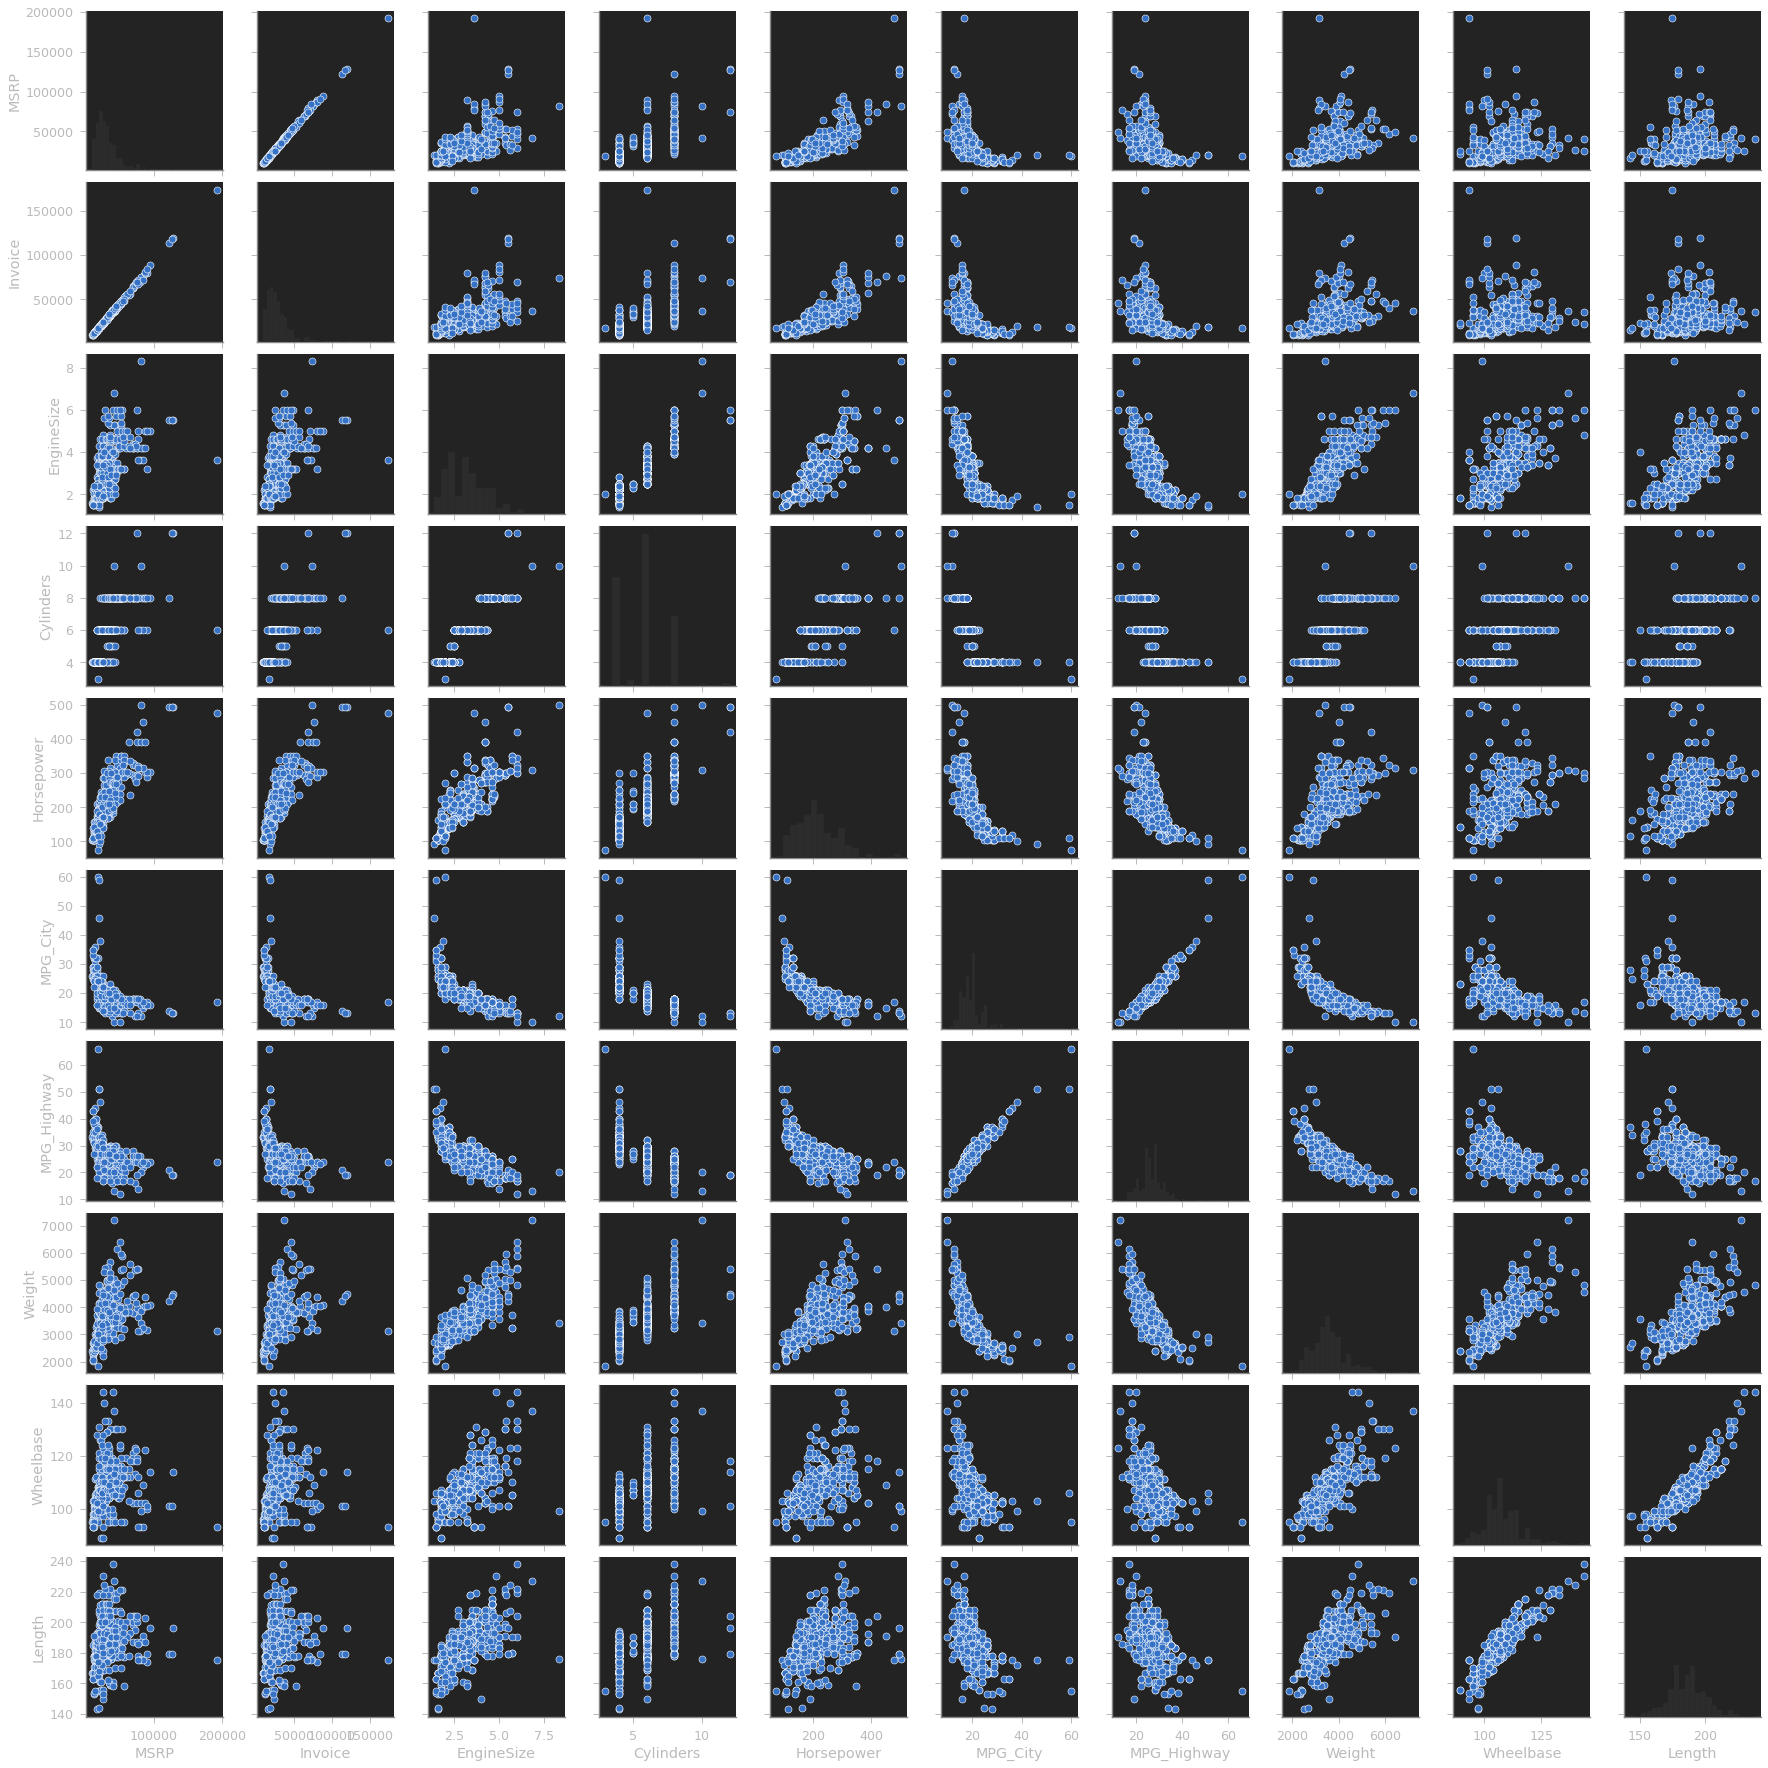

In [17]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(data = car_df)

In [18]:
# Let's view various makes of the cars
car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [19]:
# Interactive histogram with plotly.express
fig = px.histogram(car_df, x = "Make",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR",
                  color_discrete_sequence = ["blue"]
                   )                 
fig.show()

In [20]:
# Let's view various the types of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [35]:
fig = px.histogram(car_df, x = "Type",
                  labels = {"Type":"Type"},
                  title = "TYPE OF THE CAR",
                  color_discrete_sequence = ["darkcyan"]
                   )                 
fig.show()

In [22]:
# Let's plot the location
car_df.Origin.unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [27]:
fig = px.histogram(car_df, x = "Origin",
                  labels = {"Origin":"Origin"},
                  title = "LOCATION OF THE CAR SALES",
                  color_discrete_sequence = ["darkturquoise"]
                   )                  
fig.show()

In [29]:
# Let's view the drivetrain of the cars
car_df.DriveTrain.unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [32]:
fig = px.histogram(car_df, x = "DriveTrain",
                  labels = {"DriveTrain":"Drivetrain"},
                  title = "DRIVETRAIN OF THE CAR",
                  color_discrete_sequence = ["midnightblue"]
                   )               
fig.show()

In [36]:
# Plot the make of the car and its location
fig = px.histogram(car_df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "MAKE OF THE CAR vs LOCATION"
                  )                 
fig.show()

In [37]:
# Plot the Make of the car and its Type
# Find which Manufacturer has high number of Sports type car
# Find which Manufacturer has Hybrid cars
fig = px.histogram(car_df, x = "Make",
                   color = "Type",
                   labels = {"Make": "Manufacturer"},
                   title = "MAKE OF THE CAR vs TYPE"
                   )
fig.show()

# TASK #4: PERFORM DATA VISUALIZATION - PART #2

In [38]:
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

In [39]:
car_df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170,22,29,2822,101,180


In [43]:
# Display the Model values in a text format
text = car_df.Model.values
text

array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [45]:
# Get the stopwords
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [46]:
# Create a WordCloud
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))          

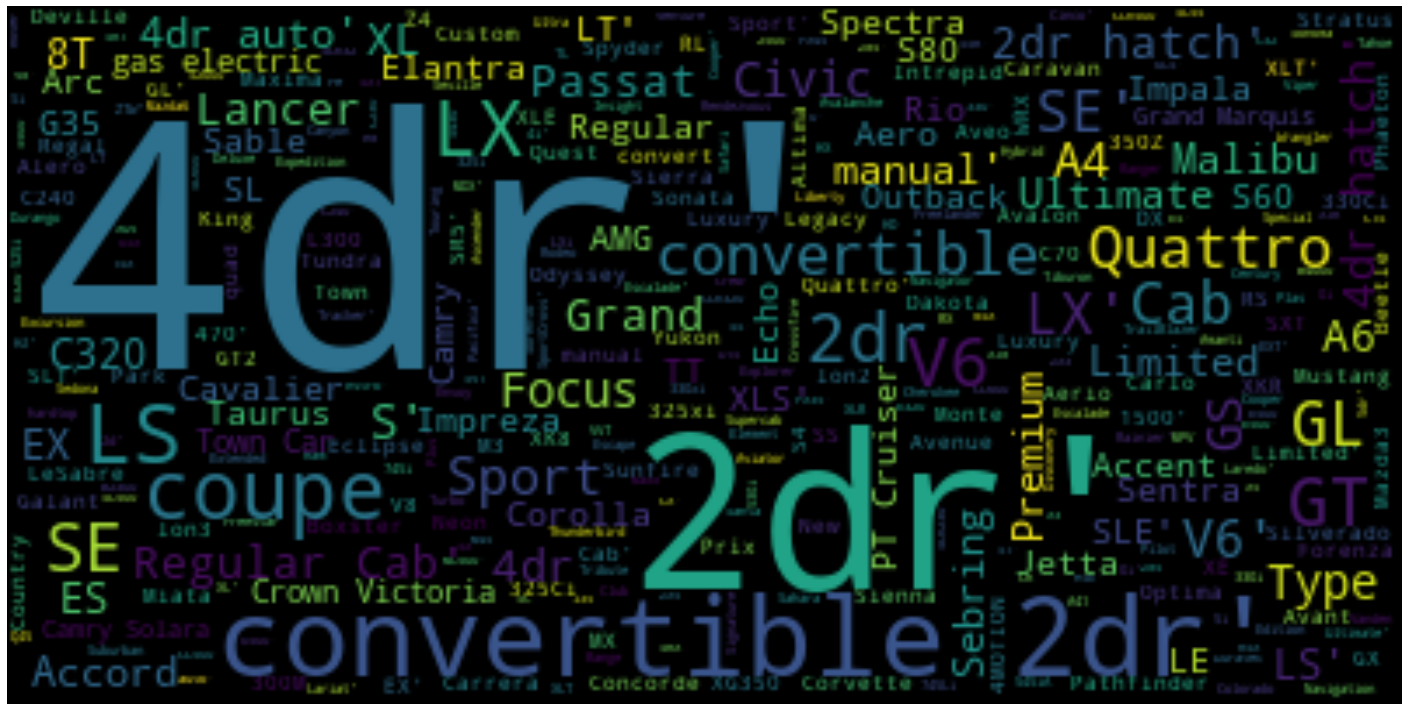

In [47]:
# Plot the WordCloud
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [48]:
# Obtain the correlation matrix
car_df.corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.573238,0.649742,0.827296,-0.475916,-0.440523,0.447987,0.151665,0.171060
Invoice,0.999132,1.000000,0.566019,0.645226,0.824079,-0.471304,-0.435452,0.441916,0.148003,0.165645
EngineSize,0.573238,0.566019,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.827296,0.824079,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.475916,-0.471304,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.440523,-0.435452,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.447987,0.441916,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.151665,0.148003,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.171060,0.165645,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


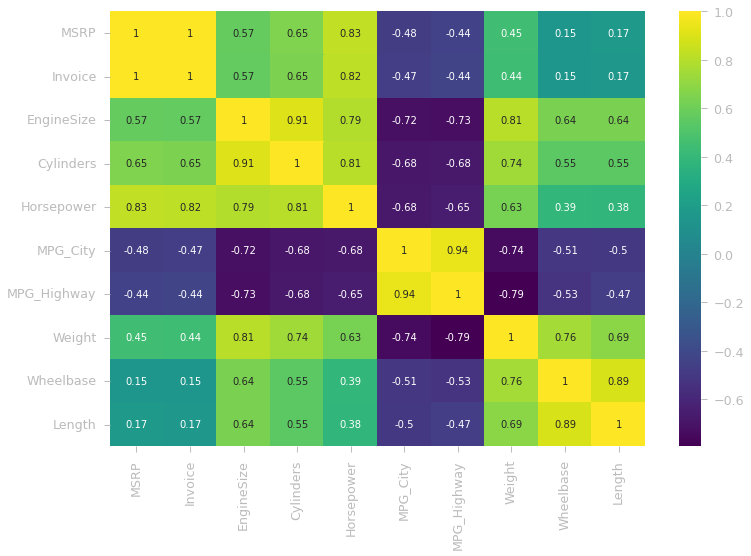

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(car_df.corr(), annot = True, cmap='viridis')

### Conclusion derived from the correlation matrix
- We see that the highest positive correlation can be observed in relation to the Invoice feature(perfect pos. correlation = 1), the Horsepower has also a high correlation with MSRP price, which makes prefect sense, the more Horsepower the car has, the more it costs. 

# TASK #5: PREPARE THE DATA BEFORE MODEL TRAINING

In [53]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [57]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
df_dum = pd.get_dummies(car_df, columns = ["Make", "Model", "Type", "Origin", "DriveTrain"])

In [58]:
df_dum

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,33337,3.5,6.0,265,17,23,4451,106,189,...,0,0,0,0,1,0,0,1,0,0
1,23820,21761,2.0,4.0,200,24,31,2778,101,172,...,1,0,0,0,1,0,0,0,1,0
2,26990,24647,2.4,4.0,200,22,29,3230,105,183,...,1,0,0,0,1,0,0,0,1,0
3,33195,30299,3.2,6.0,270,20,28,3575,108,186,...,1,0,0,0,1,0,0,0,1,0
4,43755,39014,3.5,6.0,225,18,24,3880,115,197,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,38203,2.4,5.0,197,21,28,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
424,42565,40083,2.3,5.0,242,20,26,3450,105,186,...,1,0,0,0,0,1,0,0,1,0
425,45210,42573,2.9,6.0,268,19,26,3653,110,190,...,1,0,0,0,0,1,0,0,1,0
426,26135,24641,1.9,4.0,170,22,29,2822,101,180,...,0,0,0,1,0,1,0,0,1,0


In [59]:
# Invoice feature does not contribute to car price prediction 
df_data = df_dum.drop(["Invoice"], axis = 1)
df_data

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,40565,2.4,5.0,197,21,28,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
424,42565,2.3,5.0,242,20,26,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
425,45210,2.9,6.0,268,19,26,3653,110,190,0,...,1,0,0,0,0,1,0,0,1,0
426,26135,1.9,4.0,170,22,29,2822,101,180,0,...,0,0,0,1,0,1,0,0,1,0


In [60]:
df_data.shape

(426, 482)

In [61]:
# Feeding input features to X and output (MSRP) to y
X = df_data.drop("MSRP", axis = 1)
y = df_data["MSRP"]

In [65]:
# Transform features into NumPy arrays
X = np.array(X)
y = np.array(y)

In [64]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape

(340, 481)

# TASK #5: TRAIN AND EVALUATE A MULTIPLE LINEAR REGRESSION

### Simple Linear Regression
- In a simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable while Y is the dependent variable.
- Why simple? Because it examines the relationship between two variables only.
- Why linear? As the independent variable X increases (or decreases), the dependent variable Y increases (or decreases) in a linear fashion.
- The goal is to obtain a relationship (model) between X and y so as:
 y = b + m * x
 - y = dependent variable 
  -x = independent variable
  -b = intecept 
  -m = slope of line
      

### Multiple Linear Regression: Intuition

- Multiple Linear Regression examines the relationship between two or more features to the dependent variable.
- Recall taht Simple Linear Regression is a statistical model that examines only the relationship between two variables only.
- Each independent variable has its own corresponsing coefficient.
#### How to btain Model parameters?
- Least squares fitting is a way to find the best fit curve or line for the set of points.
- The sum of the squares of the offsets (residuals) is used to estimate the best fit curve or line.
- Least squares method is used to obtain the coefficients m and b.


In [79]:
# Import dependencies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [80]:
# Fit the model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [81]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8533601592793413

# TASK #6: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS 

### Decision Trees: Intuition
- Decision Tree is a tree-shaped diagram used to determine a course of action. Each branch represents a possible decision, occurrence or reaction.
- The Tree consists of decision nodes and leaves.
- Leaves are the decisions or the final outcomes.
- Decision nodes are where the data is split based on a certain attribute.
- Objective is to minimize the entropy which provides for teh optimum split.


### Random Forest Regression: Intuition
- Random Forest Regressor is a type of ensemble algorithm.
- It creates a set of decision trees from randomly selected subsets of training sets.
- It then combines all the predicted values from the different decision trees to find the average.
#### Random Forest: Why and How?
- It overcomes the issues with single decision trees by reducing the effect of noise.
- Overcomes overfitting problem by taking the average of all the predictions, canceling out biases.
- Suppose training set: [X1, X2, X3, X4] with labels:[L1, L2, L3, L4].
- Random Forest creates three decision trees taking imputs as follows:[X1, X2, X3], [X1, X2, X4], [X2, X3, X4].
- Example: Combines the predicted values which comes out of the 3 decision trees, sums them up and find the average.
- Runs effectively on large datasets.
- For large data, can produce highly accurate predictions.
- Rabdom Forest can maintain accuracy when a large proportion of the data is missing.

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [85]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.8377965745733404

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
RandomForest_model = RandomForestRegressor(n_estimators=5, max_depth=5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [91]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7954118078867387

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHING XG-BOOST ALGORITHM

### XGBoost: Introduction
- XGBoost (Extreme Gradient Boosting) is the algorith of choice for many data scientists and could be used for regression as well as classification tasks.
- XGBoost is a supervised learning algorithm and implements gradient boosted trees algorithm.
- The algorithm works by combining an ensemble of predictions from several weak models.
- It is robust to many distributions and relationships and offers many hyperparameters to tune the model performance.
- XGBoost offers increased speed and enhanced memory utilization.
- XGBoost is analogous to the idea of "discovering truth by building on previous discoveries".

### XGBoost: What is Boosting
- Boosting works by learning from previous mistakes(error in the model predictions) to come up with better future predictions.
- Boosting is an ensemble machine learning technique that works by training weak models in a sequential fashion.
- Each model is trying to learn from the previous weak model and become better at making predictions.
- Boosting algorithm work by building a model from the training data, then the second model is build based on the mistakes (residuals) of the first model. The algorithm repeats until the maximum number of models have been created or until the model provides for good predictions. 

### XGBoost: Steps
- XGBoost repeatedly build new models and combines them into an ensemle model.
- Initially building the first model and calculating the error for each observation in the dataset.
- Then builds a new model to predict those residuals (errors).
- Next, you add prediction from this model to the ensemble of models.
- XGBoost is supior compared to the gradient boosting algorithm since it offers a good balance between bias and variance (Gradient Boosting is optimized for the variance and tends to overfit the training data, while XGBoost offers regularization terms that can improve the model generalization).

# TASK #8: TRAIN AN XG-BOOST REGRESSOR MODEL

In [92]:
from xgboost import XGBRegressor

In [93]:
model = XGBRegressor()
model.fit(X_train, y_train)

[23:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [94]:
accuracy_XGBoost = model.score(X_test, y_test)
accuracy_XGBoost

0.8818382438543375

- XG-Boost performed best among the regressors.

# TASK #9: COMPARE MODELS AND CALCULATE REGRESSION KPIs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Linear Regression Model')]

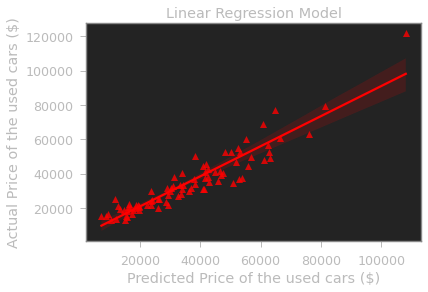

In [95]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [96]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6738.126 
MSE = 45402335.666047476 
MAE = 5208.674119765602 
R2 = 0.8533601592793413


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'Random Forest Regression Model')]

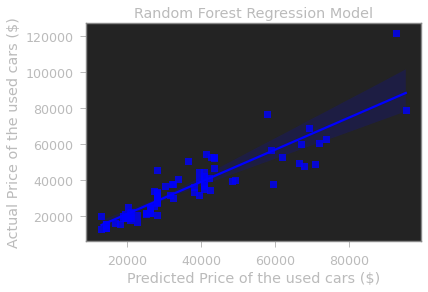

In [97]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [98]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 7958.906 
MSE = 63344188.90518808 
MAE = 5424.735465434601 
R2 = 0.7954118078867387


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of the used cars ($)'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0.5, 1.0, 'XGBoost Model')]

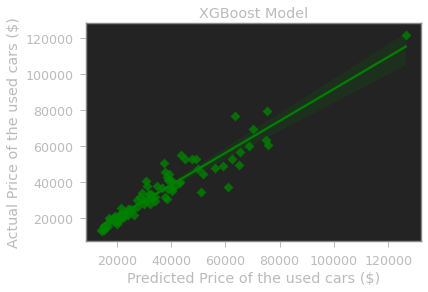

In [99]:
y_predict_XGBoost = model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [100]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 6048.554 
MSE = 36585007.792218775 
MAE = 4087.9241120094475 
R2 = 0.8818382438543375


From the ablove results, it is clearly shown that XGBoost model scores 88% accuracy which outperforms Linear Regression and Random Forest Regression models